In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def resolution_slope(a,b,c,k):
    AA=a+b*k+c*k*k
    by=np.sqrt(-4*AA/(pow(b+2*c*k,2)-4*AA*c))
    return by,np.sqrt(1/c)

In [5]:
H=2
K=-0.15
L=0
E=1.312
k=5.24

# Qx Qy hw Qz
# Mmatrix0=np.array([[35898.2,-4240.4,0,-937.7],[-4240.4,53806.9,0,10065.3],[0,0,1740.5,0],[-937.7,10065.3,0,1918.0]])
Mmatrix0=np.array([[25137.5, -2894.0,     0.0,  -529.3],
[-2894.0, 12804.7,    -0.0,  2281.1],
[    0.0,    -0.0,  1504.8,    -0.0],
[ -529.3,  2281.1,    -0.0,   434.3]])
Mmatrix0=Mmatrix0/np.log(2)/2

# convert M to Qx Qy Qz coordinate
Mconvert=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

Mmatrix=np.matmul(Mconvert,np.matmul(Mmatrix0,Mconvert))

a=Mmatrix[0,0]*H*H+Mmatrix[1,1]*K*K+Mmatrix[2,2]*L*L
a=a+2*Mmatrix[0,1]*H*K+2*Mmatrix[0,2]*L*H+2*Mmatrix[1,2]*K*L
b=2*H*Mmatrix[0,3]+2*K*Mmatrix[1,3]+2*L*Mmatrix[2,3]
c=Mmatrix[3,3]


print('M Matrix is ')
print(Mmatrix)
print('a b c are')
print(a,b,c)
print('Slope of dispersion is ')
print('k=',k)

M Matrix is 
[[18132.87329517 -2087.57972417     0.          -381.80924257]
 [-2087.57972417  9236.63859504     0.          1645.46582889]
 [    0.             0.          1085.48374876     0.        ]
 [ -381.80924257  1645.46582889     0.           313.28122813]]
a b c are
73991.86538358073 -2020.8767189508287 313.2812281290384
Slope of dispersion is 
k= 5.24


In [6]:
d,d1=resolution_slope(a,b,c,k)
print('corrected FWHM is',2*d)
print('dE=',2*d1)

corrected FWHM is 0.11400707120463169
dE= 0.11299593219169869


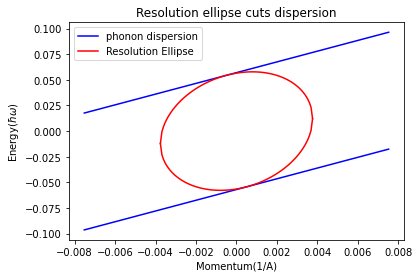

In [7]:
ub=np.sqrt(4*c/(4*a*c-b*b))
x=np.linspace(-ub,ub,100)
x1=np.linspace(-2*ub,2*ub,200)
plt.plot(x1,k*x1+d,label='phonon dispersion',color='b')
plt.plot(x1,k*x1-d,color='b')
plt.plot(x,(-b*x+np.sqrt(b*b*x*x-4*c*(a*x*x-1)))/2/c,label='Resolution Ellipse',color='r')
plt.plot(x,(-b*x-np.sqrt(b*b*x*x-4*c*(a*x*x-1)))/2/c,color='r')
plt.ylabel('Energy($\hbar\omega$)')
plt.xlabel('Momentum(1/A)')
plt.title("Resolution ellipse cuts dispersion")
plt.legend()